In [1]:
print("all ok")

all ok


In [2]:
from dotenv import load_dotenv

In [3]:
load_dotenv()

True

In [4]:
from langchain_groq import ChatGroq

In [5]:
llm=ChatGroq(model="deepseek-r1-distill-llama-70b")

In [7]:
print(llm.invoke("What is the capital of France?").content)

<think>

</think>

The capital of France is Paris.


In [8]:
print(llm.invoke("What is the capital of india tell me in detail?").content)

<think>
Okay, so I need to find out what the capital of India is and provide a detailed explanation. Hmm, I remember hearing that India's capital is New Delhi, but I'm not entirely sure. Let me think about how to approach this.

First, I should confirm whether New Delhi is indeed the capital. I think it is, but I might be confusing it with Mumbai or another major city. India is a large country with many significant cities, so it's important to get this right. Maybe I can recall some basic facts about India's government. I know India is a republic, so they have a president and a prime minister. The capital is where the central government is located.

I remember that New Delhi is the capital, while Mumbai is the financial hub, and Kolkata, Chennai, and Bangalore are other major cities. So, that would mean New Delhi is the administrative center. But wait, sometimes people talk about Old Delhi too. Is that the same as New Delhi? I think they are adjacent but distinct areas. Old Delhi is mo

In [9]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY=os.getenv("TAVILY_API_KEY")
search_tool=TavilySearchResults(tavily_api_key=TAVILY_API_KEY)

In [10]:
search_tool.invoke("What is the capital of France?")

[{'title': 'Paris facts: the capital of France in history',
  'url': 'https://home.adelphi.edu/~ca19535/page%204.html',
  'content': 'page 4\n\n===============\n\nHomeSpainSydneySan FranciscoParisLas VegasMaui\n\n Paris, France\n\nImage 1\n\nParis facts: Paris, the capital of France\n---------------------------------------------\n\nParis is the capital of France, the largest country of Europe with 550 000 km2 (65 millions inhabitants).\n\nParis has 2.234 million inhabitants end 2011. She is the core of Ile de France region (12 million people). [...] Before Paris, the capital of France was Lyon (under the Romans). Paris first became the capital of France in 508 under King Clovis. After centuries with no unique capital of France, Paris retrieved its status of capital of France under King Philippe Auguste, who reigned between 1180 and 1223. You can see remains of the Philippe August Paris walls in the passageway between the Louvre parking and Louvre Museum [...] Paris remained the capital

In [11]:
my_code = """
x=10
y=x+10
print(y)
"""

In [12]:
from langchain_experimental.utilities import PythonREPL

In [13]:
repl=PythonREPL()

In [14]:
repl.run(my_code)

Python REPL can execute arbitrary code. Use with caution.


'20\n'

In [15]:
repl.invoke(my_code)

AttributeError: 'PythonREPL' object has no attribute 'invoke'

In [16]:
from typing import Annotated

In [17]:
from langchain_core.tools import tool

In [18]:
@tool
def python_repl_tool(code: Annotated[str, "The python code to execute to generate your chart."]):
    """Use this to execute python code and do math. If you want to see the output of a value,
    you should print it out with `print(...)`. This is visible to the user."""
    
    try:
        result = repl.run(code)
    except BaseException as e:
        return f"Failed to execute. Error: {repr(e)}"
    
    result_str = f"Successfully executed:\n\`\`\`python\n{code}\n\`\`\`\nStdout: {result}"
    return result_str

In [19]:
python_repl_tool.invoke("x=10\ny=x+10\nprint(y)")

'Successfully executed:\n\\`\\`\\`python\nx=10\ny=x+10\nprint(y)\n\\`\\`\\`\nStdout: 20\n'

In [20]:
python_repl_tool.invoke(my_code)

'Successfully executed:\n\\`\\`\\`python\n\nx=10\ny=x+10\nprint(y)\n\n\\`\\`\\`\nStdout: 20\n'

### WE HAVE TWO SUB AGENT 
1. RESEARCHER- internet
2. CODER- executing the code

In [21]:
members=["researcher","coder"]

In [22]:
members

['researcher', 'coder']

In [23]:
options = members+["FINISH"]

In [24]:
options

['researcher', 'coder', 'FINISH']

In [25]:
from typing import Literal

In [26]:
from typing_extensions import TypedDict

## There is no routing logic
### it is simply going to return the next candidate(next_agent)
### this next is containig the next candidate name

In [27]:
class Router(TypedDict):
    next: Literal['researcher', 'coder', 'FINISH']

In [28]:
from langgraph.graph import MessagesState,StateGraph,START, END

In [92]:
class State(MessagesState):
    next:str

##### this is how my state will be looking like

In [109]:
state={"messages": ["hi"], "next": "research_agent"}

In [122]:
system_prompt = f""""
You are a supervisor, tasked with managing a conversation between the following workers: {members}. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
"""

In [ ]:
# system_prompt = f""""
# You are a supervisor, tasked with managing a conversation between the following workers: {members}. 
# Given the following user request, respond with the worker to act next. 
# Each worker will perform a task and respond with their results and status. 
# When finished, respond with FINISH.
# **Strict Guidelines:**
# if there is any common messages like hi, hello, how are you, greetings etc then,respond with FINISH.
# """

In [117]:
print(system_prompt)

"
You are a supervisor, tasked with managing a conversation between the following workers: ['researcher', 'coder']. 
Given the following user request, respond with the worker to act next. 
Each worker will perform a task and respond with their results and status. 
When finished, respond with FINISH.
**Strict Guidelines:**
if there is any common messages like hi, hello, how are you, greetings etc then,respond with FINISH.



In [124]:
messages = [{"role": "system", "content": system_prompt},] + state["messages"]

In [125]:
messages

[{'role': 'system',
  'content': '"\nYou are a supervisor, tasked with managing a conversation between the following workers: [\'researcher\', \'coder\']. \nGiven the following user request, respond with the worker to act next. \nEach worker will perform a task and respond with their results and status. \nWhen finished, respond with FINISH.\n'},
 'hi']

[{'role': 'system',
  'content': '"\nYou are a supervisor, tasked with managing a conversation between the following workers: [\'researcher\', \'coder\']. \nGiven the following user request, respond with the worker to act next. \nEach worker will perform a task and respond with their results and status. \nWhen finished, respond with FINISH.\n**Strict Guidelines:**\nif there is any common messages like hi, hello, how are you, greetings etc then,respond with FINISH.\n'},
 'hi']

In [126]:
llm_with_structure_output=llm.with_structured_output(Router)

In [127]:
llm_with_structure_output.invoke(messages)

{'next': 'researcher'}

#### you can try out with this prompt also

In [ ]:
# system_prompt = f"""
# You are a supervisor managing a task delegation system with the following workers: {members}.

# Your job is to decide which worker should act next based on the user’s input.

# Guidelines:
# - Carefully read the user’s message.
# - If the message clearly requires a specific action (e.g., search, compute, rewrite), assign it to the appropriate worker.
# - If the message is general, conversational, or does **not** require any specific action, immediately respond with `FINISH`.
# - Do **not** invent tasks or assign actions unless the message clearly demands it.

# Each worker will return results after completing their task.
# Once all necessary tasks are completed, end the flow by responding with `FINISH`.

# Be strict — if the message is casual, rhetorical, or lacks a clear task, reply with `FINISH`.
# """


#### This is my all three agents

In [66]:
from langgraph.types import Command

In [78]:
def supervisor_agent(state:State)->Command[Literal['researcher', 'coder', '__end__']]:
    
    messages = [{"role": "system", "content": system_prompt},] + state["messages"]
    
    llm_with_structure_output=llm.with_structured_output(Router)
    
    response=llm_with_structure_output.invoke(messages)
    
    #this is my next worker agent
    goto=response["next"]
    
    print("**********BELOW IS MY GOTO***************")
    
    print(goto)
    
    if goto == "FINISH":
        goto=END
        
    return Command(goto=goto, update={"next":goto})

In [79]:
from langgraph.prebuilt import create_react_agent

In [80]:
from langchain_core.messages import AIMessage, HumanMessage

In [81]:
def research_agent(state: State) -> Command[Literal["supervisor"]]:
    
    research_agent = create_react_agent(llm, tools=[search_tool], prompt="You are a researcher. DO NOT do any math.")
    
    result=research_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="researcher")
            ]
        },
        goto="supervisor",
    )
    

In [82]:
def coder_agent(state:State)->Command[Literal['supervisor']]:
    code_agent=create_react_agent(llm,tools=[python_repl_tool], prompt="You are a coder. DO NOT do any research.")
    result=code_agent.invoke(state)
    
    return Command(
        update={
            "messages": [
                HumanMessage(content=result["messages"][-1].content, name="coder")
            ]
        },
        goto="supervisor",
    )
    

#### this is my orchestration flow with langgraph

In [83]:
graph=StateGraph(State)

In [84]:
graph.add_node("supervisor", supervisor_agent)

In [85]:
graph.add_node("researcher", research_agent)

In [86]:
graph.add_node("coder", coder_agent)

In [87]:
graph.add_edge(START, "supervisor")

In [88]:
app=graph.compile()

In [89]:
from IPython.display import display,Image

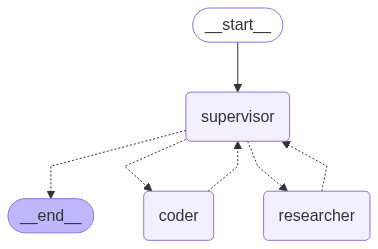

In [90]:
display(Image(app.get_graph().draw_mermaid_png()))

In [91]:
for s in app.stream({"messages": [("user", "What's the square root of 42?")]}, subgraphs=True):
    print(s)
    print("**********BELOW IS MY STATE***************")

**********BELOW IS MY GOTO***************
researcher
((), {'supervisor': {'next': 'researcher'}})
**********BELOW IS MY STATE***************
(('researcher:e0e32795-39e7-69b9-240b-2f4fa746f8da',), {'agent': {'messages': [AIMessage(content='The square root of 42 is approximately 6.48. More precisely, it is an irrational number around 6.4807.', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 1020, 'prompt_tokens': 179, 'total_tokens': 1199, 'completion_time': 3.709090909, 'prompt_time': 0.013256146, 'queue_time': 0.052613450000000006, 'total_time': 3.722347055}, 'model_name': 'deepseek-r1-distill-llama-70b', 'system_fingerprint': 'fp_1bbe7845ec', 'finish_reason': 'stop', 'logprobs': None}, id='run--5e9097ff-8b4d-4aa6-b3fd-c8c11a314934-0', usage_metadata={'input_tokens': 179, 'output_tokens': 1020, 'total_tokens': 1199})]}})
**********BELOW IS MY STATE***************
((), {'researcher': {'messages': [HumanMessage(content='The square root of 42 is approximately